# Clustering Challenge

Clustering is an *unsupervised* machine learning technique in which you train a model to group similar entities into clusters based on their features.

In this exercise, you must separate a dataset consisting of three numeric features (**A**, **B**, and **C**) into clusters. Run the cell below to load the data.

In [1]:
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


Your challenge is to identify the number of discrete clusters present in the data, and create a clustering model that separates the data into that number of clusters. You should also visualize the clusters to evaluate the level of separation achieved by your model.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [04 - Clustering Solution.ipynb](04%20-%20Clustering%20Solution.ipynb).

# Use PCA to make 2D version visualization

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_features  = MinMaxScaler().fit_transform(data)

pca = PCA(n_components=2).fit(scaled_features)
features2D = pca.transform(scaled_features)
features2D

array([[ 0.38631524, -0.05515159],
       [ 0.5679739 , -0.06144958],
       [-0.2979762 ,  0.08474023],
       ...,
       [-0.13072154,  0.0767816 ],
       [ 0.43722666, -0.02364599],
       [-0.21179279,  0.02825676]])

In [4]:
features2D[:,0]

array([ 3.86315244e-01,  5.67973900e-01, -2.97976200e-01, -4.60522163e-01,
        4.41347231e-01,  4.20967175e-01, -5.78631840e-01, -1.40351807e-01,
        4.75751306e-01,  5.70243349e-01, -3.90922157e-01,  8.68041836e-02,
        2.05682754e-01,  2.26016151e-03, -2.52361092e-01, -9.79726653e-02,
       -3.28818891e-01,  9.42320491e-02,  9.58280623e-03, -7.34850541e-02,
        3.40724176e-01, -2.24248263e-01,  3.87107436e-01,  3.62889399e-01,
       -2.37905052e-01,  2.23523271e-01, -4.09753034e-01,  3.88097232e-01,
        2.27650969e-01, -4.05767239e-02,  2.07716387e-01,  3.83865199e-01,
       -4.22320365e-01, -1.69602792e-01, -1.57039887e-01,  3.43742849e-01,
       -1.99536352e-02, -2.03759277e-01,  4.06669423e-01,  1.99066771e-02,
       -1.58970758e-01, -1.15776402e-01, -4.22503177e-01,  1.11789647e-01,
       -3.42200924e-01,  3.25506823e-01,  5.66653653e-01, -4.95421252e-01,
       -4.97412174e-01, -1.62017324e-01,  3.44203449e-01,  1.55633335e-01,
       -3.22165208e-01, -

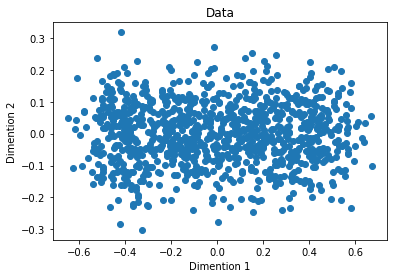

In [6]:
# let's visualize
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features2D[:,0], features2D[:,1])
plt.xlabel('Dimention 1')
plt.ylabel('Dimention 2')
plt.title('Data')
plt.show()

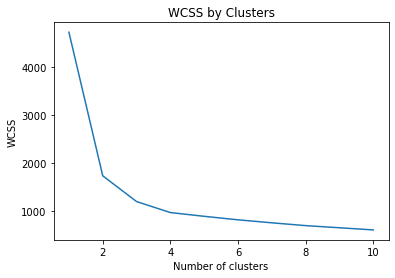

In [8]:
# TO find suitable cluster number; let's apply WCCS
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wccs = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wccs.append(kmeans.inertia_)

plt.plot(range(1,11), wccs)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
# therefor, it is observant that there is four possible cluster exists
# let's use KMeans algorithm


from sklearn.cluster import KMeans

model = KMeans(n_clusters=4, init='k-means++', n_init=500, max_iter=1500)
km_clusters = model.fit_predict(data)
km_clusters

array([0, 0, 3, 3, 0, 0, 3, 1, 0, 0, 3, 2, 2, 1, 1, 1, 3, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 3, 0, 2, 1, 2, 0, 3, 1, 1, 0, 1, 1, 0, 1, 1, 1, 3, 2,
       3, 0, 0, 3, 3, 1, 0, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 2, 3, 2, 1, 1, 3, 2, 1, 1, 1, 0, 2, 1, 2, 3, 2, 1, 3, 2, 1,
       1, 2, 2, 2, 3, 1, 2, 1, 3, 1, 3, 2, 1, 2, 3, 2, 1, 2, 3, 1, 1, 3,
       1, 2, 0, 0, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 1, 2, 1, 3, 0, 2, 2,
       2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 3, 3, 1, 3, 1, 1, 3, 0, 0, 1,
       0, 2, 0, 1, 1, 1, 2, 0, 3, 3, 1, 2, 2, 0, 0, 3, 0, 2, 1, 3, 1, 2,
       2, 1, 1, 0, 1, 0, 2, 2, 1, 3, 0, 3, 3, 2, 2, 0, 2, 1, 3, 2, 1, 1,
       0, 3, 2, 3, 3, 3, 0, 0, 3, 1, 3, 0, 3, 3, 2, 0, 3, 1, 1, 3, 0, 3,
       1, 0, 2, 3, 2, 1, 2, 0, 2, 0, 1, 0, 2, 1, 0, 3, 3, 0, 3, 2, 3, 2,
       3, 1, 1, 2, 3, 0, 0, 1, 3, 1, 2, 2, 3, 3, 3, 0, 3, 0, 1, 3, 3, 1,
       0, 1, 2, 2, 2, 1, 3, 0, 1, 2, 0, 2, 3, 1, 1, 0, 3, 3, 2, 0, 0, 3,
       3, 2, 3, 0, 0, 2, 0, 3, 3, 3, 1, 1, 2, 0, 3,

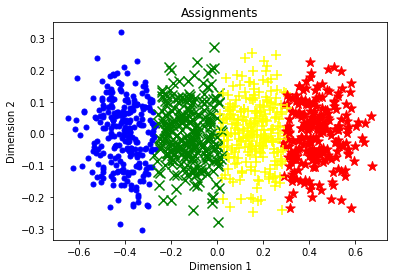

In [11]:
def plot_clusters(samples, clusters):
    col_dic = {0:'red',1:'green',2:'yellow', 3:'blue'}
    mrk_dic = {0:'*',1:'x',2:'+', 3:'.'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()

plot_clusters(features2D, km_clusters)

In [14]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

take = AgglomerativeClustering(n_clusters=4)
res = take.fit_predict(data)
res

array([1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 0, 3, 3, 2, 0, 2, 2, 3, 3, 2, 1, 2,
       1, 1, 2, 1, 0, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 1, 3, 2, 2, 0, 3,
       0, 1, 1, 0, 0, 2, 1, 3, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2,
       3, 2, 3, 0, 3, 2, 2, 0, 3, 2, 3, 2, 1, 2, 2, 3, 0, 3, 2, 0, 3, 2,
       2, 3, 3, 3, 2, 2, 3, 2, 0, 0, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 0,
       2, 3, 1, 1, 3, 0, 3, 0, 1, 3, 2, 3, 0, 2, 1, 2, 3, 2, 0, 1, 3, 3,
       2, 2, 3, 3, 2, 1, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       1, 3, 1, 2, 2, 2, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 3, 2, 0, 2, 1,
       3, 2, 3, 1, 2, 1, 2, 3, 3, 0, 1, 2, 0, 3, 3, 1, 3, 2, 0, 3, 2, 2,
       1, 0, 3, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 2, 3, 1, 0, 3, 2, 0, 1, 0,
       2, 1, 1, 0, 3, 2, 3, 1, 3, 1, 2, 1, 3, 2, 1, 0, 0, 1, 2, 3, 2, 3,
       0, 2, 2, 1, 0, 1, 1, 3, 0, 2, 3, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 2,
       1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 3, 0, 2, 2, 1, 0, 0, 3, 1, 1, 0,
       0, 3, 0, 1, 1, 3, 1, 2, 0, 0, 2, 2, 3, 1, 2,

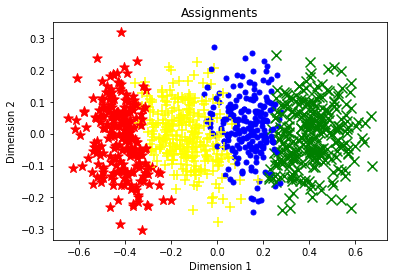

In [15]:
plot_clusters(features2D, res)